Author: Benjamin Goffin

Description: This code  generates a comparative figure of spatial variations in monthly smap values at two resolutions for a given catchment and year.

Date created: November 1st, 2021

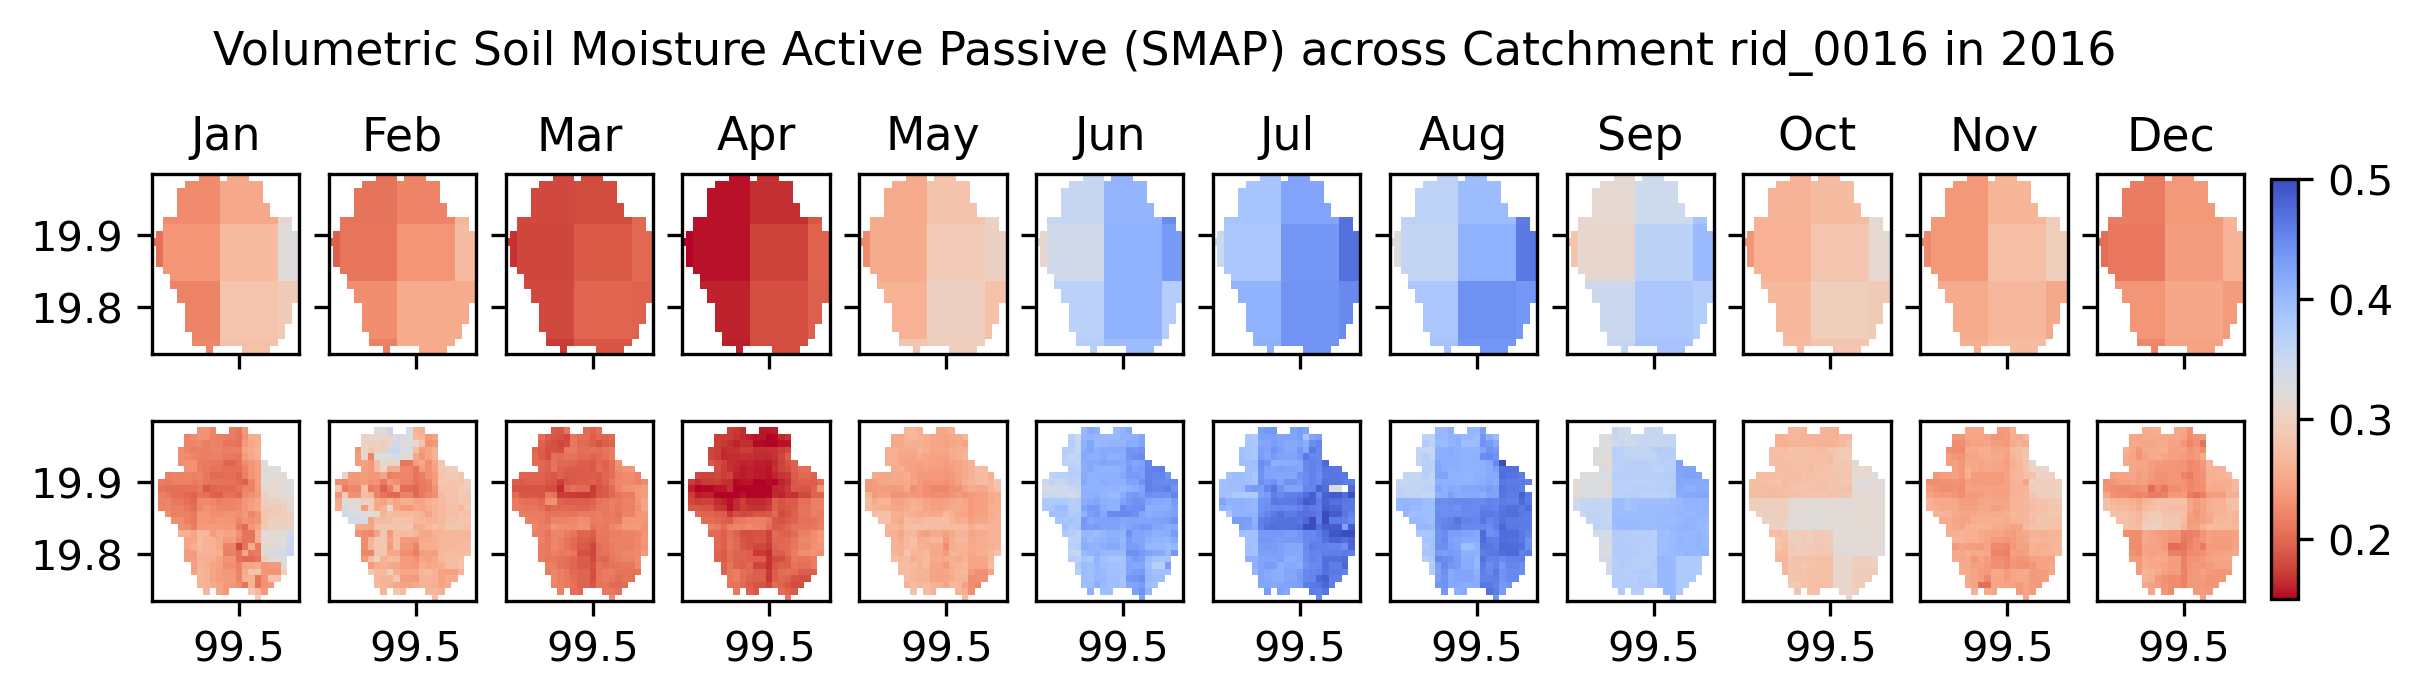

In [5]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd

# Set catchment string
catchment = 'rid_0016'

# Create variable lists 
res = ['9km', '1km']
avg = ['avg_upsampled', 'avg']

# Create  figure and color style
fig, axs = plt.subplots(ncols=12, nrows=2, figsize=(9, 2), sharey=True, sharex=True, dpi=300) 
warmcool = plt.cm.get_cmap('coolwarm').reversed()

# Generate plots
for i in range(len(res)): # iterate through resolution settings
    path = 'D:/Research/2021 Mekong/Data/smap/' + res[i] + '/warp/layer/clip/' + catchment + '/' + avg[i] + '/' # assign path based on given resolution
    month_files = [name for name in os.listdir(path) if name.endswith('.tif')] # recognize monthly average files at given path
    for j in range(len(month_files)): # iterate through month values
        f = path + month_files[j] 
        raster = rasterio.open(f) 
        img = raster.read(1)
        img[img == 0] = np.nan
        img[img > 1] = np.nan
        w=raster.bounds[0]
        s=raster.bounds[1]
        e=raster.bounds[2]
        n=raster.bounds[3]
        plot = axs[i,j].imshow(img, extent=[w,e,s,n], vmin = 0.15, vmax = 0.5, cmap=warmcool)

# Add title
fig.suptitle('Volumetric Soil Moisture Active Passive (SMAP) across Catchment ' + catchment + ' in 2016', size=11, y=1.1)

# Add labels
month = pd.date_range('2016-01-01','2016-12-31', freq='MS').strftime("%b").tolist()
for k in range(len(month)):
    axs[0,k].set_title(month[k], size=11)

# Format ticks
axs[1,0].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.xticks([99.5])

# Add colorbars
cb_ax = fig.add_axes([0.91, 0.15, 0.01, 0.70])
cbar1 = fig.colorbar(plot, cax=cb_ax)

# Save figure
plt.savefig('C:/Users/benja/Documents/Academia/UVA/PhD/Research/2021 Mekong/Codes/superseded/output.png', facecolor='white')